In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('Madrid Daily Weather 1997-2015.csv')
df.columns = [''.join(x.split()) for x in df.columns]
df.head()

,CET,MaxTemperatureC,MeanTemperatureC,MinTemperatureC,DewPointC,MeanDewPointC,MinDewpointC,MaxHumidity,MeanHumidity,MinHumidity,MaxSeaLevelPressurehPa,MeanSeaLevelPressurehPa,MinSeaLevelPressurehPa,MaxVisibilityKm,MeanVisibilityKm,MinVisibilitykM,MaxWindSpeedKm/h,MeanWindSpeedKm/h,MaxGustSpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
0,1997-01-01,7.0,4.0,2.0,5.0,3.0,2.0,100.0,95.0,76.0,1010,1008,1004,10.0,9.0,4.0,13,6,NaN,0.0,6.0,NaN,229
1,1997-01-02,7.0,3.0,0.0,6.0,3.0,0.0,100.0,92.0,71.0,1007,1003,997,10.0,9.0,4.0,26,8,47.0,0.0,5.0,Rain,143
2,1997-01-03,5.0,3.0,2.0,5.0,1.0,-1.0,100.0,85.0,70.0,1005,999,996,10.0,10.0,7.0,27,19,NaN,0.0,6.0,Rain-Snow,256
3,1997-01-04,7.0,3.0,-1.0,-2.0,-3.0,-4.0,86.0,63.0,49.0,1012,1010,1005,10.0,10.0,10.0,27,19,40.0,0.0,2.0,NaN,284
4,1997-01-05,2.0,0.0,-1.0,2.0,0.0,-3.0,100.0,95.0,86.0,1012,1008,1005,10.0,5.0,1.0,14,6,NaN,0.0,7.0,Snow,2


# Предобработка

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CET                      6812 non-null   object 
 1   MaxTemperatureC          6810 non-null   float64
 2   MeanTemperatureC         6809 non-null   float64
 3   MinTemperatureC          6810 non-null   float64
 4   DewPointC                6810 non-null   float64
 5   MeanDewPointC            6810 non-null   float64
 6   MinDewpointC             6810 non-null   float64
 7   MaxHumidity              6810 non-null   float64
 8   MeanHumidity             6810 non-null   float64
 9   MinHumidity              6810 non-null   float64
 10  MaxSeaLevelPressurehPa   6812 non-null   int64  
 11  MeanSeaLevelPressurehPa  6812 non-null   int64  
 12  MinSeaLevelPressurehPa   6812 non-null   int64  
 13  MaxVisibilityKm          5872 non-null   float64
 14  MeanVisibilityKm        

## Temperature Min, Max, Mean

In [ ]:
# Может быть среднее считается от максимальной и минимальной но нет
df[['MeanTemperatureC', 'MaxTemperatureC', 'MinTemperatureC']]

,MeanTemperatureC,MaxTemperatureC,MinTemperatureC
0,4.0,7.0,2.0
1,3.0,7.0,0.0
2,3.0,5.0,2.0
3,3.0,7.0,-1.0
4,0.0,2.0,-1.0
...,...,...,...
6807,7.0,14.0,-1.0
6808,8.0,15.0,2.0
6809,8.0,11.0,5.0
6810,8.0,9.0,6.0


In [ ]:
# Если посмотреть ближе, видно 2 записи которые
# если заполнять, то скорее будут ошибочные
# предположения, чем приблизительное заполнение
df[df.MeanTemperatureC.isna()]

,CET,MaxTemperatureC,MeanTemperatureC,MinTemperatureC,DewPointC,MeanDewPointC,MinDewpointC,MaxHumidity,MeanHumidity,MinHumidity,MaxSeaLevelPressurehPa,MeanSeaLevelPressurehPa,MinSeaLevelPressurehPa,MaxVisibilityKm,MeanVisibilityKm,MinVisibilitykM,MaxWindSpeedKm/h,MeanWindSpeedKm/h,MaxGustSpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
1240,2000-08-22,27.0,NaN,27.0,-1.0,-1.0,-1.0,16.0,16.0,16.0,1015,1015,1015,NaN,NaN,NaN,19,19,NaN,0.0,NaN,NaN,260
1539,2001-06-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1021,1019,1018,NaN,NaN,NaN,26,14,NaN,0.0,NaN,NaN,231
1540,2001-06-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1021,1019,1016,NaN,NaN,NaN,26,11,NaN,0.0,NaN,NaN,248


In [ ]:
# Поэтому 2 записи лучше удалить
df = df[~df.MaxTemperatureC.isna()]

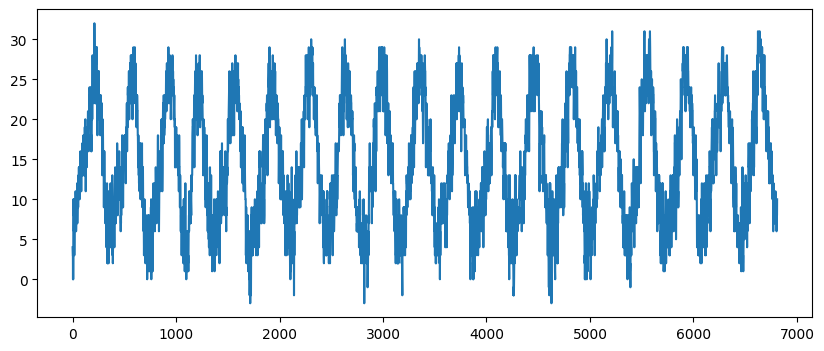

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(np.arange(len(df)), df.MeanTemperatureC)

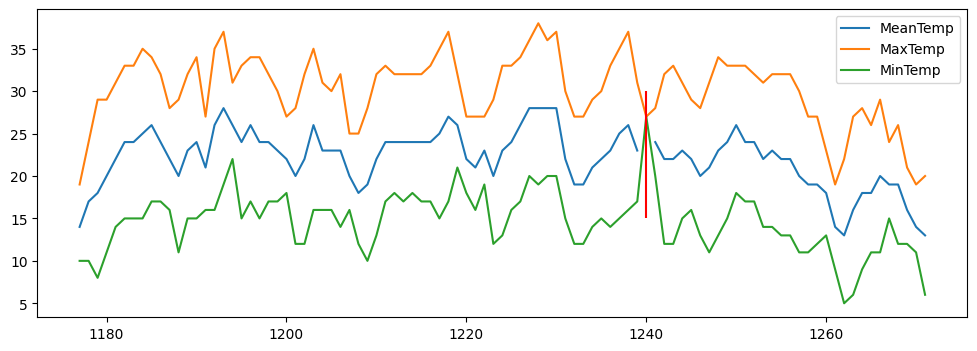

In [ ]:
# Посмотрим ближе на проблемное место
tmp = df[(df.CET > '2000-06-01') & (df.CET < '2000-10-01')]
plt.figure(figsize=(12,4))
plt.plot(tmp.index, tmp.MeanTemperatureC, label='MeanTemp')
plt.plot(tmp.index, tmp.MaxTemperatureC, label='MaxTemp')
plt.plot(tmp.index, tmp.MinTemperatureC, label='MinTemp')

nan_index = tmp.index[tmp.MeanTemperatureC.isna()][0]
plt.vlines(nan_index, 15, 30, color='r')
plt.legend()

<Axes: >

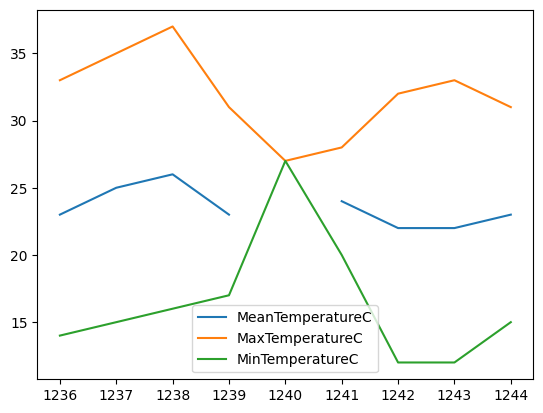

In [ ]:
# Еще ближе, уже видно проблему
tmp.loc[nan_index-4:nan_index+4][['MeanTemperatureC', 'MaxTemperatureC', 'MinTemperatureC']].plot()

In [ ]:
# Меняем проблемные места на среднюю по ближайшим ячейкам
df_nan = df.index[df.MeanTemperatureC.isna()][0]
df.loc[df_nan, ['MeanTemperatureC', 'MinTemperatureC']] = df.loc[df_nan-4:df_nan+4, ['MeanTemperatureC', 'MinTemperatureC']].mean().to_list()

## Events

In [ ]:
df.Events.loc[df.Events.isna()] = 'Clear'

<ipython-input-11-c491382a1689>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.Events.loc[df.Events.isna()] = 'Clear'


In [ ]:
df.Events.value_counts(dropna=False)

,count
Events,
Clear,5012
Rain,1140
Rain-Thunderstorm,247
Fog,233
Fog-Rain,69
Thunderstorm,45
Rain-Snow,33
Snow,14
Rain-Hail-Thunderstorm,7


## Итого пока

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6810 entries, 0 to 6811
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CET                      6810 non-null   object 
 1   MaxTemperatureC          6810 non-null   float64
 2   MeanTemperatureC         6810 non-null   float64
 3   MinTemperatureC          6810 non-null   float64
 4   DewPointC                6810 non-null   float64
 5   MeanDewPointC            6810 non-null   float64
 6   MinDewpointC             6810 non-null   float64
 7   MaxHumidity              6810 non-null   float64
 8   MeanHumidity             6810 non-null   float64
 9   MinHumidity              6810 non-null   float64
 10  MaxSeaLevelPressurehPa   6810 non-null   int64  
 11  MeanSeaLevelPressurehPa  6810 non-null   int64  
 12  MinSeaLevelPressurehPa   6810 non-null   int64  
 13  MaxVisibilityKm          5872 non-null   float64
 14  MeanVisibilityKm         5872

In [ ]:
df[df.isna().any(axis=1)]

,CET,MaxTemperatureC,MeanTemperatureC,MinTemperatureC,DewPointC,MeanDewPointC,MinDewpointC,MaxHumidity,MeanHumidity,MinHumidity,MaxSeaLevelPressurehPa,MeanSeaLevelPressurehPa,MinSeaLevelPressurehPa,MaxVisibilityKm,MeanVisibilityKm,MinVisibilitykM,MaxWindSpeedKm/h,MeanWindSpeedKm/h,MaxGustSpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
0,1997-01-01,7.0,4.0,2.0,5.0,3.0,2.0,100.0,95.0,76.0,1010,1008,1004,10.0,9.0,4.0,13,6,NaN,0.00,6.0,Clear,229
2,1997-01-03,5.0,3.0,2.0,5.0,1.0,-1.0,100.0,85.0,70.0,1005,999,996,10.0,10.0,7.0,27,19,NaN,0.00,6.0,Rain-Snow,256
4,1997-01-05,2.0,0.0,-1.0,2.0,0.0,-3.0,100.0,95.0,86.0,1012,1008,1005,10.0,5.0,1.0,14,6,NaN,0.00,7.0,Snow,2
5,1997-01-06,7.0,3.0,1.0,2.0,-1.0,-3.0,100.0,82.0,57.0,1014,1010,1008,10.0,10.0,10.0,11,5,NaN,0.00,4.0,Clear,64
6,1997-01-07,2.0,0.0,-2.0,1.0,-1.0,-3.0,100.0,93.0,75.0,1016,1014,1009,10.0,7.0,0.0,6,2,NaN,0.00,7.0,Snow,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6804,2015-12-24,11.0,6.0,0.0,5.0,2.0,-1.0,100.0,84.0,54.0,1034,1030,1028,18.0,8.0,4.0,10,5,NaN,0.00,NaN,Clear,360
6805,2015-12-25,14.0,6.0,-2.0,6.0,2.0,-2.0,100.0,83.0,45.0,1036,1032,1031,14.0,5.0,2.0,14,5,NaN,0.00,NaN,Fog,349
6806,2015-12-26,12.0,6.0,-1.0,6.0,2.0,-2.0,100.0,87.0,56.0,1037,1033,1031,14.0,7.0,3.0,11,5,NaN,0.00,5.0,Clear,348
6807,2015-12-27,14.0,7.0,-1.0,6.0,2.0,-2.0,100.0,77.0,30.0,1035,1030,1027,31.0,14.0,5.0,14,6,NaN,0.00,8.0,Fog,38


In [ ]:
correct = df[~df.isna().any(axis=1)]

In [ ]:
correct.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2846 entries, 1 to 6810
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CET                      2846 non-null   object 
 1   MaxTemperatureC          2846 non-null   float64
 2   MeanTemperatureC         2846 non-null   float64
 3   MinTemperatureC          2846 non-null   float64
 4   DewPointC                2846 non-null   float64
 5   MeanDewPointC            2846 non-null   float64
 6   MinDewpointC             2846 non-null   float64
 7   MaxHumidity              2846 non-null   float64
 8   MeanHumidity             2846 non-null   float64
 9   MinHumidity              2846 non-null   float64
 10  MaxSeaLevelPressurehPa   2846 non-null   int64  
 11  MeanSeaLevelPressurehPa  2846 non-null   int64  
 12  MinSeaLevelPressurehPa   2846 non-null   int64  
 13  MaxVisibilityKm          2846 non-null   float64
 14  MeanVisibilityKm         2846

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6810 entries, 0 to 6811
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CET                      6810 non-null   object 
 1   MaxTemperatureC          6810 non-null   float64
 2   MeanTemperatureC         6810 non-null   float64
 3   MinTemperatureC          6810 non-null   float64
 4   DewPointC                6810 non-null   float64
 5   MeanDewPointC            6810 non-null   float64
 6   MinDewpointC             6810 non-null   float64
 7   MaxHumidity              6810 non-null   float64
 8   MeanHumidity             6810 non-null   float64
 9   MinHumidity              6810 non-null   float64
 10  MaxSeaLevelPressurehPa   6810 non-null   int64  
 11  MeanSeaLevelPressurehPa  6810 non-null   int64  
 12  MinSeaLevelPressurehPa   6810 non-null   int64  
 13  MaxVisibilityKm          5872 non-null   float64
 14  MeanVisibilityKm         5872

## Дальше сложно. Correlation

<Axes: >

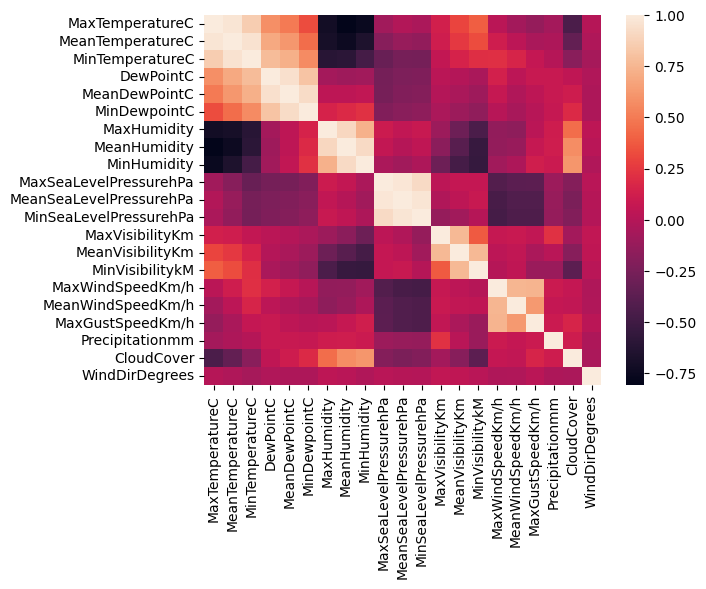

In [ ]:
sns.heatmap(df.select_dtypes(include='number').corr())

## CloudCover

In [ ]:
df.CloudCover.value_counts(dropna=False)

,count
CloudCover,
NaN,1370
1.0,1232
4.0,891
2.0,873
3.0,870
5.0,807
6.0,556
7.0,90
0.0,85


In [ ]:
df[df.CloudCover.isna()]

,CET,MaxTemperatureC,MeanTemperatureC,MinTemperatureC,DewPointC,MeanDewPointC,MinDewpointC,MaxHumidity,MeanHumidity,MinHumidity,MaxSeaLevelPressurehPa,MeanSeaLevelPressurehPa,MinSeaLevelPressurehPa,MaxVisibilityKm,MeanVisibilityKm,MinVisibilitykM,MaxWindSpeedKm/h,MeanWindSpeedKm/h,MaxGustSpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
40,1997-02-10,14.0,7.0,0.0,5.0,3.0,-1.0,100.0,76.0,51.0,1033,1031,1030,NaN,NaN,NaN,8,3,NaN,0.0,NaN,Clear,284
49,1997-02-19,18.0,10.0,2.0,7.0,4.0,2.0,100.0,71.0,40.0,1035,1033,1030,NaN,NaN,NaN,11,3,NaN,0.0,NaN,Clear,287
58,1997-02-28,21.0,11.0,2.0,5.0,2.0,0.0,93.0,59.0,28.0,1035,1033,1031,NaN,NaN,NaN,10,3,NaN,0.0,NaN,Clear,347
59,1997-03-01,21.0,12.0,4.0,6.0,4.0,3.0,93.0,65.0,33.0,1032,1030,1028,NaN,NaN,NaN,8,5,NaN,0.0,NaN,Clear,339
60,1997-03-02,23.0,13.0,4.0,8.0,6.0,3.0,100.0,63.0,31.0,1033,1031,1029,NaN,NaN,NaN,11,3,NaN,0.0,NaN,Clear,331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6799,2015-12-19,16.0,9.0,2.0,5.0,3.0,1.0,100.0,74.0,31.0,1031,1026,1023,31.0,10.0,6.0,11,6,NaN,0.0,NaN,Clear,340
6802,2015-12-22,16.0,8.0,0.0,6.0,3.0,-1.0,100.0,78.0,36.0,1038,1033,1030,31.0,12.0,5.0,10,5,NaN,0.0,NaN,Clear,344
6803,2015-12-23,15.0,8.0,0.0,5.0,2.0,-1.0,100.0,78.0,35.0,1035,1031,1028,31.0,12.0,3.0,10,5,23.0,0.0,NaN,Clear,343
6804,2015-12-24,11.0,6.0,0.0,5.0,2.0,-1.0,100.0,84.0,54.0,1034,1030,1028,18.0,8.0,4.0,10,5,NaN,0.0,NaN,Clear,360


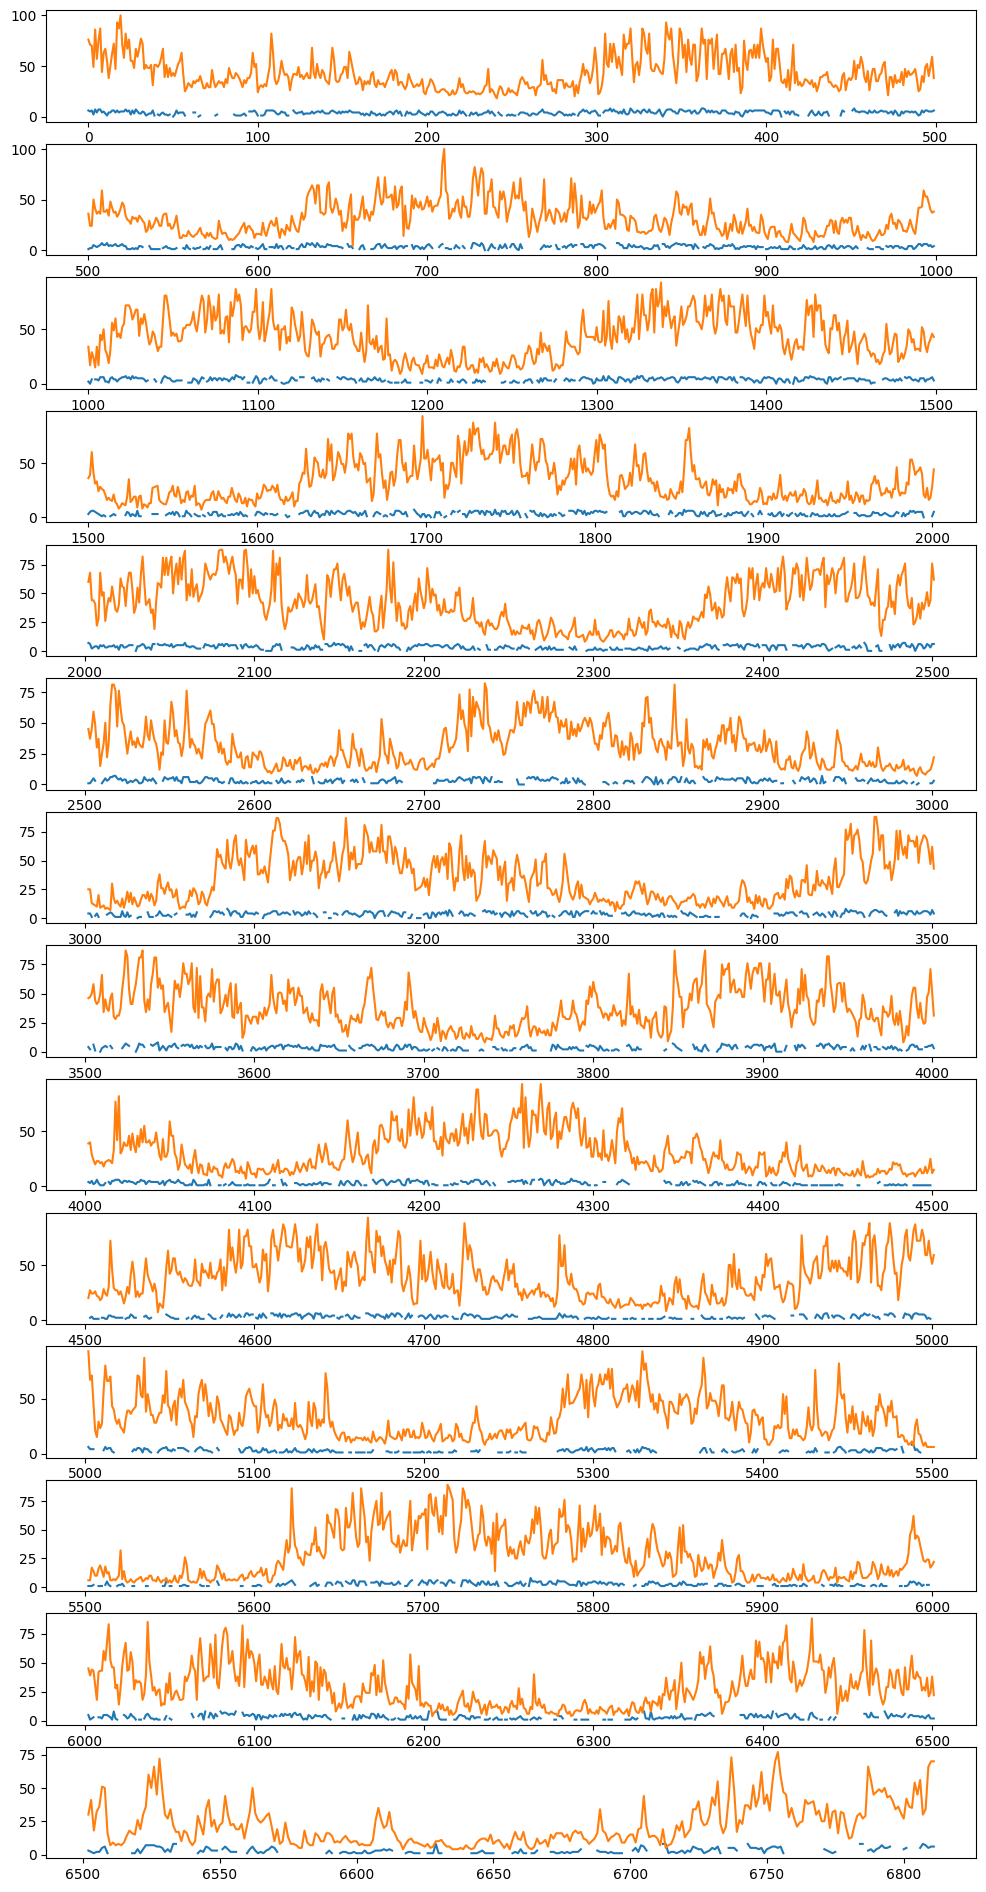

In [ ]:
# По графику нет системы
fig, axes = plt.subplots(nrows=int(7000/500), figsize=(12,24))
for i, ax in enumerate(axes):
  df.CloudCover.iloc[i*500:(i+1)*500].plot(ax=ax)
  df.MinHumidity.iloc[i*500:(i+1)*500].plot(ax=ax)

In [ ]:
df.drop(columns=['CloudCover'], axis=1, inplace=True)

## WindSpeed

In [ ]:
df['MaxGustSpeedKm/h'].value_counts(dropna=False).sort_index()

,count
MaxGustSpeedKm/h,
19.0,1
21.0,15
23.0,41
24.0,80
26.0,112
27.0,125
29.0,146
32.0,139
34.0,164


In [ ]:
df[['MaxWindSpeedKm/h', 'MeanWindSpeedKm/h', 'MaxGustSpeedKm/h']].corr()

,MaxWindSpeedKm/h,MeanWindSpeedKm/h,MaxGustSpeedKm/h
MaxWindSpeedKm/h,1.000000,0.751416,0.742583
MeanWindSpeedKm/h,0.751416,1.000000,0.622609
MaxGustSpeedKm/h,0.742583,0.622609,1.000000


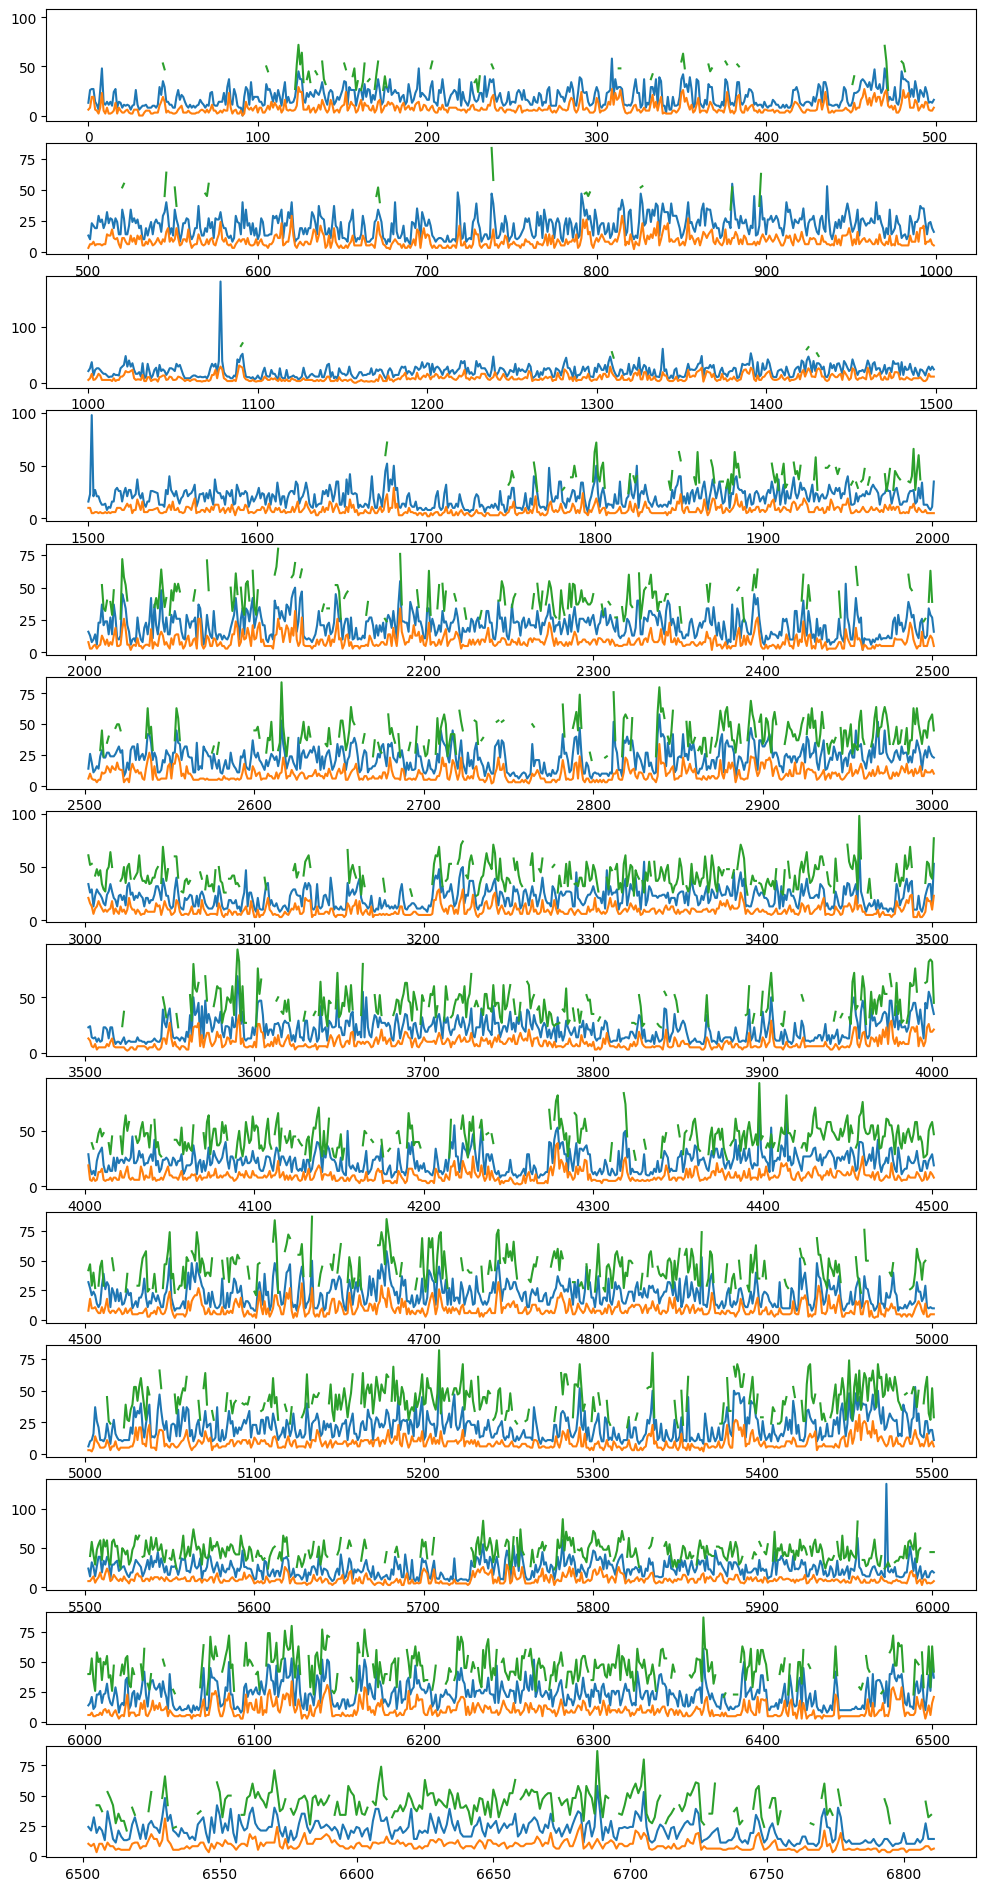

In [ ]:
fig, axes = plt.subplots(nrows=int(7000/500), figsize=(12,24))
for i, ax in enumerate(axes):
  df.iloc[i*500:(i+1)*500][['MaxWindSpeedKm/h', 'MeanWindSpeedKm/h', 'MaxGustSpeedKm/h']].plot(ax=ax)
  ax.get_legend().remove()

In [ ]:
df.drop(columns=['MaxGustSpeedKm/h'], axis=1, inplace=True)

## Visibility

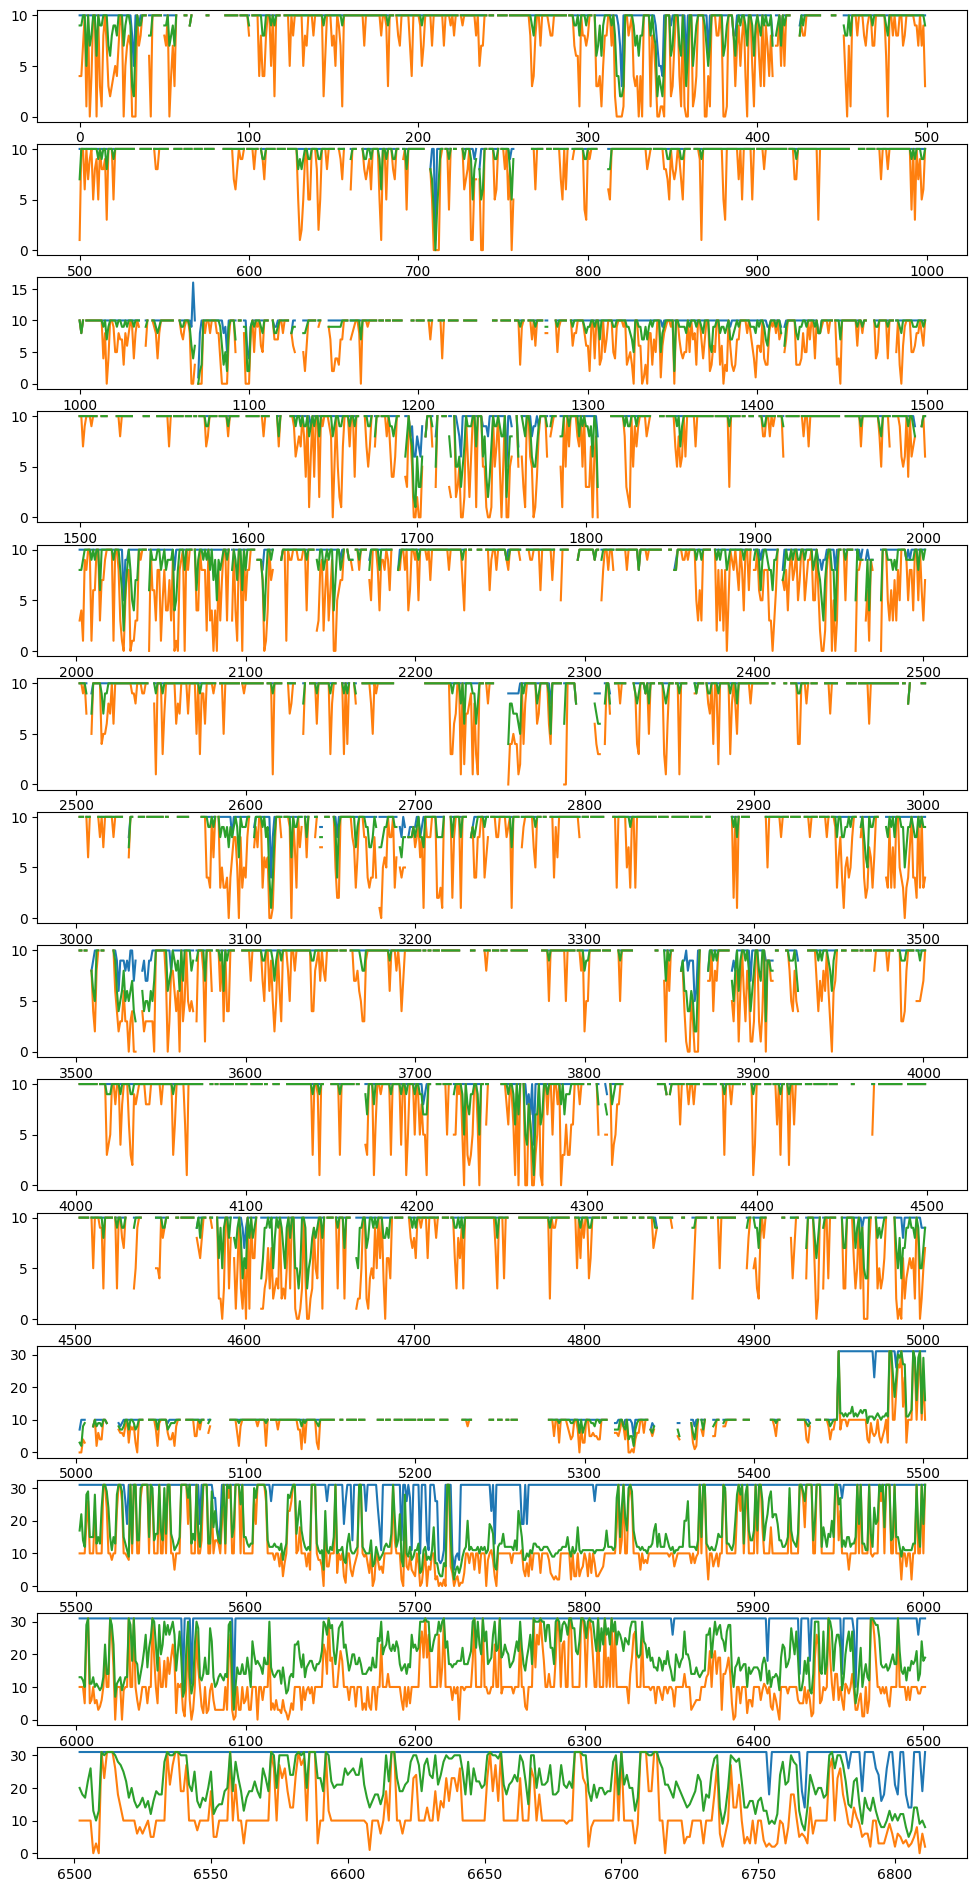

In [ ]:
# информация о видимости отсутствует сразу во всех полях
fig, axes = plt.subplots(nrows=int(7000/500), figsize=(12,24))
for i, ax in enumerate(axes):
  df.iloc[i*500:(i+1)*500][['MaxVisibilityKm', 'MinVisibilitykM', 'MeanVisibilityKm']].plot(ax=ax)
  ax.get_legend().remove()

In [ ]:
tmp = df[df[['MaxVisibilityKm', 'MinVisibilitykM', 'MeanVisibilityKm']].isna().any(axis=1)]
tmp.describe()

,MaxTemperatureC,MeanTemperatureC,MinTemperatureC,DewPointC,MeanDewPointC,MinDewpointC,MaxHumidity,MeanHumidity,MinHumidity,MaxSeaLevelPressurehPa,MeanSeaLevelPressurehPa,MinSeaLevelPressurehPa,MaxVisibilityKm,MeanVisibilityKm,MinVisibilitykM,MaxWindSpeedKm/h,MeanWindSpeedKm/h,Precipitationmm,WindDirDegrees
count,938.000000,938.000000,938.000000,938.000000,938.000000,938.000000,938.000000,938.000000,938.000000,938.000000,938.000000,938.000000,0.0,0.0,0.0,938.000000,938.000000,938.0,938.000000
mean,23.791045,15.272388,7.172116,5.127932,1.752665,-2.000000,72.744136,46.529851,23.128998,1023.428571,1021.450959,1019.124733,NaN,NaN,NaN,17.133262,7.126866,0.0,207.706823
std,8.543382,8.046268,7.699216,4.924255,4.602516,4.860048,18.000373,16.771032,11.569261,5.197869,5.210228,5.452268,NaN,NaN,NaN,7.020046,3.141607,0.0,136.808907
min,3.000000,-2.000000,-10.000000,-12.000000,-15.000000,-22.000000,16.000000,15.000000,6.000000,1007.000000,1002.000000,999.000000,NaN,NaN,NaN,2.000000,2.000000,0.0,1.000000
25%,17.000000,8.000000,1.000000,2.000000,-1.000000,-5.000000,58.250000,32.000000,14.000000,1020.000000,1018.000000,1015.000000,NaN,NaN,NaN,11.000000,5.000000,0.0,40.000000
50%,24.000000,16.000000,7.000000,6.000000,2.000000,-1.000000,74.000000,44.000000,20.000000,1023.000000,1021.000000,1019.000000,NaN,NaN,NaN,14.000000,6.000000,0.0,261.000000
75%,32.000000,23.000000,14.000000,9.000000,5.000000,1.000000,87.000000,62.000000,31.000000,1027.000000,1025.000000,1022.750000,NaN,NaN,NaN,23.000000,8.000000,0.0,339.000000
max,38.000000,30.000000,24.000000,16.000000,13.000000,12.000000,100.000000,84.000000,70.000000,1040.000000,1037.000000,1036.000000,NaN,NaN,NaN,45.000000,23.000000,0.0,360.000000


In [ ]:
visibility = df[df['MeanVisibilityKm'].isna()]

In [ ]:
for c in visibility.columns:
  print(visibility[c].value_counts(dropna=False))

CET
1997-02-10    1
2008-12-23    1
2008-10-05    1
2008-10-06    1
2008-11-15    1
             ..
2004-06-03    1
2004-06-04    1
2004-06-17    1
2004-07-01    1
2012-03-31    1
Name: count, Length: 938, dtype: int64
MaxTemperatureC
35.0    52
34.0    47
32.0    45
31.0    42
33.0    42
23.0    40
21.0    38
30.0    36
29.0    35
24.0    34
16.0    34
19.0    33
11.0    33
18.0    32
20.0    31
17.0    31
28.0    30
36.0    28
22.0    28
25.0    28
14.0    27
12.0    27
13.0    23
26.0    22
27.0    20
10.0    19
37.0    18
15.0    18
9.0     13
7.0      9
8.0      8
38.0     5
5.0      4
4.0      3
6.0      2
3.0      1
Name: count, dtype: int64
MeanTemperatureC
 26.0    66
 24.0    59
 23.0    54
 12.0    44
 7.0     43
 22.0    42
 13.0    41
 3.0     41
 6.0     40
 27.0    40
 4.0     38
 16.0    37
 8.0     36
 9.0     35
 14.0    34
 11.0    34
 19.0    32
 17.0    32
 10.0    32
 21.0    31
 20.0    31
 18.0    25
 2.0     17
 28.0    13
 1.0     10
 0.0      8
 29.0     7
 2

In [ ]:
df.drop(columns=['MaxVisibilityKm', 'MeanVisibilityKm', 'MinVisibilitykM'], axis=1, inplace=True)

# Категории в числа

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6810 entries, 0 to 6811
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CET                      6810 non-null   object 
 1   MaxTemperatureC          6810 non-null   float64
 2   MeanTemperatureC         6810 non-null   float64
 3   MinTemperatureC          6810 non-null   float64
 4   DewPointC                6810 non-null   float64
 5   MeanDewPointC            6810 non-null   float64
 6   MinDewpointC             6810 non-null   float64
 7   MaxHumidity              6810 non-null   float64
 8   MeanHumidity             6810 non-null   float64
 9   MinHumidity              6810 non-null   float64
 10  MaxSeaLevelPressurehPa   6810 non-null   int64  
 11  MeanSeaLevelPressurehPa  6810 non-null   int64  
 12  MinSeaLevelPressurehPa   6810 non-null   int64  
 13  MaxWindSpeedKm/h         6810 non-null   int64  
 14  MeanWindSpeedKm/h        6810

In [ ]:
df.describe()

,MaxTemperatureC,MeanTemperatureC,MinTemperatureC,DewPointC,MeanDewPointC,MinDewpointC,MaxHumidity,MeanHumidity,MinHumidity,MaxSeaLevelPressurehPa,MeanSeaLevelPressurehPa,MinSeaLevelPressurehPa,MaxWindSpeedKm/h,MeanWindSpeedKm/h,Precipitationmm,WindDirDegrees
count,6810.000000,6810.000000,6810.000000,6810.000000,6810.000000,6810.000000,6810.000000,6810.000000,6810.000000,6810.000000,6810.000000,6810.000000,6810.000000,6810.000000,6810.000000,6810.000000
mean,21.039648,14.659985,8.638979,8.120705,4.976211,1.451248,81.139354,57.971366,34.729369,1020.529222,1017.972834,1015.216887,21.951982,9.169750,0.111214,197.222173
std,8.867187,7.580662,6.834659,4.741067,4.654270,4.909705,17.531839,19.675744,19.320359,6.236852,6.481012,6.945677,9.905126,5.110381,0.967314,119.888104
min,0.000000,-3.000000,-10.000000,-12.000000,-15.000000,-22.000000,16.000000,15.000000,4.000000,994.000000,986.000000,965.000000,0.000000,0.000000,0.000000,-1.000000
25%,13.000000,8.000000,3.000000,5.000000,2.000000,-2.000000,68.000000,41.000000,19.000000,1017.000000,1014.000000,1011.000000,14.000000,6.000000,0.000000,66.000000
50%,20.000000,14.000000,9.000000,8.000000,6.000000,2.000000,87.000000,59.000000,32.000000,1020.000000,1018.000000,1015.000000,21.000000,8.000000,0.000000,223.000000
75%,29.000000,21.000000,14.000000,12.000000,8.000000,5.000000,94.000000,74.000000,47.750000,1024.000000,1022.000000,1019.000000,27.000000,11.000000,0.000000,299.000000
max,41.000000,32.000000,28.000000,20.000000,16.000000,14.000000,100.000000,100.000000,100.000000,1047.000000,1043.000000,1041.000000,182.000000,39.000000,32.000000,360.000000


In [ ]:
df.drop(columns=['MaxTemperatureC',
                 'MinTemperatureC',
                 'DewPointC',
                 'MinDewpointC',
                 'MaxHumidity',
                 'MinHumidity',
                 'MaxSeaLevelPressurehPa',
                 'MinSeaLevelPressurehPa',
                 'MaxWindSpeedKm/h',
                 'CET'], axis=1, inplace=True)

In [ ]:
df.Events.value_counts()

,count
Events,
Clear,5012
Rain,1140
Rain-Thunderstorm,247
Fog,233
Fog-Rain,69
Thunderstorm,45
Rain-Snow,33
Snow,14
Rain-Hail-Thunderstorm,7


In [ ]:
df.loc[df.Events != 'Clear', 'Events'] = 'Perceptuation'

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder().fit(df.Events)
df.Events = le.transform(df.Events)

<Axes: >

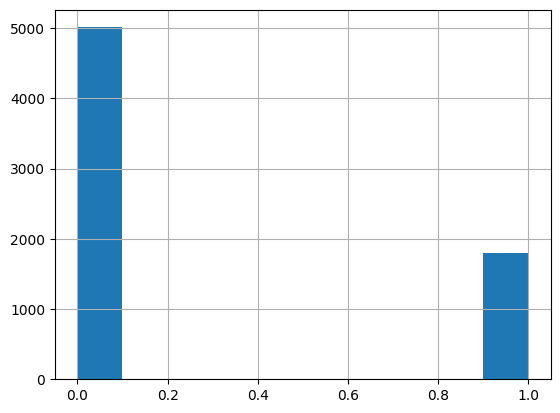

In [ ]:
df.Events.hist()

##Проверка на нормальность

In [ ]:
from matplotlib import pyplot as plt
import scipy.stats as stats
from scipy.stats import shapiro

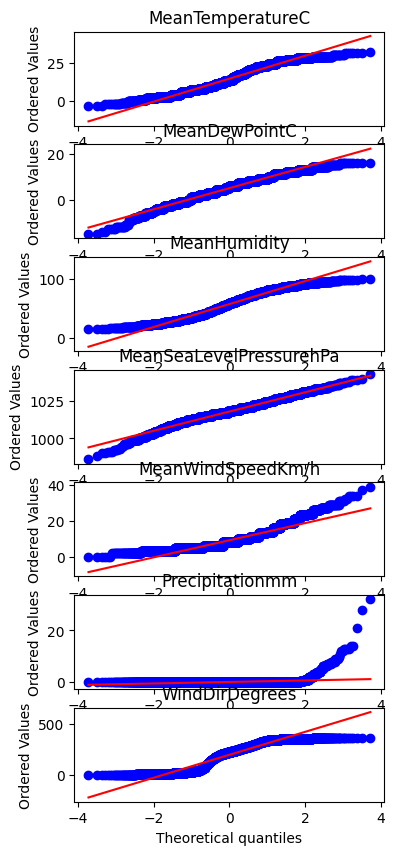

In [ ]:
fig, ax = plt.subplots(nrows=7, figsize=(4,10))
features = df.drop('Events', axis=1)
for i,c in enumerate(features):
  stats.probplot(features[c], dist="norm", plot=ax[i]);
  ax[i].set_title(c)

In [ ]:
print('Тест Шапиро-Уилка')
for c in features.columns:
  stat, p = shapiro(features[c])
  print(c, end='')
  if p > 0.05:
    print(' +')
  else:
    print(' -')

Тест Шапиро-Уилка
MeanTemperatureC -
MeanDewPointC -
MeanHumidity -
MeanSeaLevelPressurehPa -
MeanWindSpeedKm/h -
Precipitationmm -
WindDirDegrees -


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6810.
  res = hypotest_fun_out(*samples, **kwds)


# Модели

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Без нормирования
X_train, X_test, y_train, y_test = train_test_split(df.drop('Events', axis=1), df.Events, random_state=3, test_size=0.3)


In [ ]:
results = pd.DataFrame({})
# def add_result(scaler_name, model_metrics):
#     results[scaler_name] = model_metrics

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import f1_score

def fit_models(scaler_type):
  # Decision Tree
  model_dt = DecisionTreeClassifier()
  model_dt.fit(X_train, y_train)
  dt_preds = model_dt.predict(X_test)
  dt_result = f1_score(dt_preds, y_test)

  # SVM RBF
  model_svm_rbf = SVC(kernel='rbf')
  model_svm_rbf.fit(X_train, y_train)
  svm_rbf_preds = model_svm_rbf.predict(X_test)
  svm_rbf_result = f1_score(svm_rbf_preds, y_test)

  # SVM polymon=4
  model_svm_poly = SVC(kernel='poly', degree=4)
  model_svm_poly.fit(X_train, y_train)
  svm_poly_preds = model_svm_poly.predict(X_test)
  svm_poly_result = f1_score(svm_poly_preds, y_test)

  # knn
  knn_clf = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
  knn_preds = knn_clf.predict(X_test)
  knn_results = f1_score(knn_preds, y_test)

  # Random Forest
  rf_clf = RandomForestClassifier(n_estimators= 100).fit(X_train, y_train)
  rf_preds = rf_clf.predict(X_test)
  rf_results = f1_score(rf_preds, y_test)

  # SGD
  sgd_clf = SGDClassifier(max_iter=10000, tol=1e-2, learning_rate='adaptive', eta0=1e-8).fit(X_train, y_train)
  sgd_preds = sgd_clf.predict(X_test)
  sgd_results = f1_score(sgd_preds, y_test)

  results[scaler_type] = {'DT': round(dt_result, 2),
                        'SVM_rbf': round(svm_rbf_result, 2),
                        'SVM_poly': round(svm_rbf_result, 2),
                        'kNN': round(knn_results, 2),
                        'RF': round(rf_results, 2),
                        'SGD': round(sgd_results, 2)
                        }
  return results

In [ ]:
fit_models('Unscaled')

,Unscaled
DT,0.63
SVM_rbf,0.11
SVM_poly,0.11
kNN,0.66
RF,0.72
SGD,0.00


In [ ]:
X_train.describe() # unscaled

,MeanTemperatureC,MeanDewPointC,MeanHumidity,MeanSeaLevelPressurehPa,MeanWindSpeedKm/h,Precipitationmm,WindDirDegrees
count,4767.000000,4767.000000,4767.000000,4767.000000,4767.000000,4767.000000,4767.000000
mean,14.679043,4.956367,57.876232,1017.919656,9.176841,0.112035,197.400462
std,7.585337,4.598777,19.752449,6.444186,5.116927,1.039603,119.830486
min,-2.000000,-14.000000,16.000000,986.000000,0.000000,0.000000,-1.000000
25%,8.000000,2.000000,41.000000,1014.000000,6.000000,0.000000,68.000000
50%,14.000000,5.000000,59.000000,1018.000000,8.000000,0.000000,224.000000
75%,21.000000,8.000000,74.000000,1022.000000,11.000000,0.000000,298.000000
max,32.000000,16.000000,100.000000,1043.000000,39.000000,32.000000,360.000000


In [ ]:
pd.DataFrame(X_train).describe()

,MeanTemperatureC,MeanDewPointC,MeanHumidity,MeanSeaLevelPressurehPa,MeanWindSpeedKm/h,Precipitationmm,WindDirDegrees
count,4767.000000,4767.000000,4767.000000,4767.000000,4767.000000,4767.000000,4767.000000
mean,14.679043,4.956367,57.876232,1017.919656,9.176841,0.112035,197.400462
std,7.585337,4.598777,19.752449,6.444186,5.116927,1.039603,119.830486
min,-2.000000,-14.000000,16.000000,986.000000,0.000000,0.000000,-1.000000
25%,8.000000,2.000000,41.000000,1014.000000,6.000000,0.000000,68.000000
50%,14.000000,5.000000,59.000000,1018.000000,8.000000,0.000000,224.000000
75%,21.000000,8.000000,74.000000,1022.000000,11.000000,0.000000,298.000000
max,32.000000,16.000000,100.000000,1043.000000,39.000000,32.000000,360.000000


# StandardScaler
$$x=\frac{x-\mu}{\sigma}$$

In [ ]:
from sklearn.preprocessing import StandardScaler
features = df.drop('Events', axis=1)
ss = StandardScaler().fit(features)
df_scaled = ss.transform(features)

X_train, X_test, y_train, y_test = train_test_split(df_scaled, df.Events, random_state=3, test_size=0.3)

fit_models('StandardScaler').head(10)

,Unscaled,StandardScaler
DT,0.63,0.64
SVM_rbf,0.11,0.71
SVM_poly,0.11,0.71
kNN,0.66,0.68
RF,0.72,0.72
SGD,0.00,0.70


In [ ]:
X_train

array([[ 1.23217481, -0.42463295, -1.62503202, ...,  0.1624753 ,
        -0.11498077,  0.20668978],
       [-0.08706809,  0.64972816,  0.45890501, ...,  1.92372592,
        -0.11498077,  0.39854943],
       [ 1.10025052, -0.20976072, -1.42172109, ...,  0.35816981,
        -0.11498077,  0.59875079],
       ...,
       [ 0.96832623,  0.21998372, -1.21841016, ...,  0.74955884,
        -0.11498077, -0.6358243 ],
       [-1.01053813, -1.49899406, -0.10020005, ...,  0.1624753 ,
        -0.11498077, -1.54507218],
       [ 0.44062907,  0.21998372, -0.30351098, ...,  0.1624753 ,
        -0.11498077,  1.29111386]])

In [ ]:
pd.DataFrame(ss.inverse_transform(X_train)).describe()

,0,1,2,3,4,5,6
count,4767.000000,4767.000000,4767.000000,4767.000000,4767.000000,4767.000000,4767.000000
mean,14.679043,4.956367,57.876232,1017.919656,9.176841,0.112035,197.400462
std,7.585337,4.598777,19.752449,6.444186,5.116927,1.039603,119.830486
min,-2.000000,-14.000000,16.000000,986.000000,0.000000,0.000000,-1.000000
25%,8.000000,2.000000,41.000000,1014.000000,6.000000,0.000000,68.000000
50%,14.000000,5.000000,59.000000,1018.000000,8.000000,0.000000,224.000000
75%,21.000000,8.000000,74.000000,1022.000000,11.000000,0.000000,298.000000
max,32.000000,16.000000,100.000000,1043.000000,39.000000,32.000000,360.000000


# MinMaxScaler
$$x=\frac{x-x_{min}}{x_{max}-x_{min}}$$

In [ ]:
from sklearn.preprocessing import MinMaxScaler
features = df.drop('Events', axis=1)
ss = MinMaxScaler().fit(features)
df_scaled = ss.transform(features)
X_train, X_test, y_train, y_test = train_test_split(df_scaled, df.Events, random_state=3, test_size=0.3)

fit_models('MinMaxScaler')

,Unscaled,StandardScaler,MinMaxScaler
DT,0.63,0.64,0.64
SVM_rbf,0.11,0.71,0.69
SVM_poly,0.11,0.71,0.69
kNN,0.66,0.68,0.68
RF,0.72,0.72,0.73
SGD,0.00,0.70,0.00


In [ ]:
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6
count,4767.000000,4767.000000,4767.000000,4767.000000,4767.000000,4767.000000,4767.000000
mean,0.505116,0.643754,0.504426,0.559994,0.235304,0.003501,0.549586
std,0.216724,0.148348,0.232382,0.113056,0.131203,0.032488,0.331940
min,0.028571,0.032258,0.011765,0.000000,0.000000,0.000000,0.000000
25%,0.314286,0.548387,0.305882,0.491228,0.153846,0.000000,0.191136
50%,0.485714,0.645161,0.517647,0.561404,0.205128,0.000000,0.623269
75%,0.685714,0.741935,0.694118,0.631579,0.282051,0.000000,0.828255
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# MaxAbsScaler
$$x=\frac{x}{|x_{max}|}$$

In [ ]:
from sklearn.preprocessing import MaxAbsScaler
features = df.drop('Events', axis=1)
ss = MaxAbsScaler().fit(features)
df_scaled = ss.transform(features)
X_train, X_test, y_train, y_test = train_test_split(df_scaled, df.Events, random_state=3, test_size=0.3)

fit_models('MaxAbsScaler')

,Unscaled,StandardScaler,MinMaxScaler,MaxAbsScaler
DT,0.63,0.64,0.64,0.64
SVM_rbf,0.11,0.71,0.69,0.66
SVM_poly,0.11,0.71,0.69,0.66
kNN,0.66,0.68,0.68,0.63
RF,0.72,0.72,0.73,0.72
SGD,0.00,0.70,0.00,0.00


# RobustScaler
$$x=\frac{x-x_{med}}{x_{75}-x_{25}}$$

In [ ]:
from sklearn.preprocessing import RobustScaler
features = df.drop('Events', axis=1)
ss = RobustScaler().fit(features)
df_scaled = ss.transform(features)
X_train, X_test, y_train, y_test = train_test_split(df_scaled, df.Events, random_state=3, test_size=0.3)

fit_models('RobustScaler')

,Unscaled,StandardScaler,MinMaxScaler,MaxAbsScaler,RobustScaler
DT,0.63,0.64,0.64,0.64,0.63
SVM_rbf,0.11,0.71,0.69,0.66,0.71
SVM_poly,0.11,0.71,0.69,0.66,0.71
kNN,0.66,0.68,0.68,0.63,0.69
RF,0.72,0.72,0.73,0.72,0.72
SGD,0.00,0.70,0.00,0.00,0.49


In [ ]:
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6
count,4767.000000,4767.000000,4767.000000,4767.000000,4767.000000,4767.000000,4767.000000
mean,0.052234,-0.173939,-0.034054,-0.010043,0.235368,0.112035,-0.109869
std,0.583487,0.766463,0.598559,0.805523,1.023385,1.039603,0.514294
min,-1.230769,-3.333333,-1.303030,-4.000000,-1.600000,0.000000,-0.961373
25%,-0.461538,-0.666667,-0.545455,-0.500000,-0.400000,0.000000,-0.665236
50%,0.000000,-0.166667,0.000000,0.000000,0.000000,0.000000,0.004292
75%,0.538462,0.333333,0.454545,0.500000,0.600000,0.000000,0.321888
max,1.384615,1.666667,1.242424,3.125000,6.200000,32.000000,0.587983


# Normalizer
$$x_{l1}=\sum{|x|}$$

$$x_{l2}=\sum{(x)^2}$$

In [ ]:
from sklearn.preprocessing import Normalizer
features = df.drop('Events', axis=1)
ss = Normalizer().fit(features)
df_scaled = ss.transform(features)
X_train, X_test, y_train, y_test = train_test_split(df_scaled, df.Events, random_state=3, test_size=0.3)

fit_models('Normalizer')

,Unscaled,StandardScaler,MinMaxScaler,MaxAbsScaler,RobustScaler,Normalizer
DT,0.63,0.64,0.64,0.64,0.63,0.61
SVM_rbf,0.11,0.71,0.69,0.66,0.71,0.00
SVM_poly,0.11,0.71,0.69,0.66,0.71,0.00
kNN,0.66,0.68,0.68,0.63,0.69,0.64
RF,0.72,0.72,0.73,0.72,0.72,0.70
SGD,0.00,0.70,0.00,0.00,0.49,0.00


# PowerTransformer

BoxCox
$$x=\begin{cases}
      \frac{x^\lambda-1}{\lambda}, \lambda \ne 0\\
      \ln(x), \lambda = 1\\
\end{cases}$$

Yeo-Johnson
$$x=\begin{cases}
      \frac{(x+1)^\lambda-1}{\lambda}, \lambda \ne 0, x\ge 0\\
      \log(x+1), \lambda = 1, x \ge 0\\
      -\frac{(-x+1)^{(2-\lambda)}-1}{2-\lambda}, \lambda \ne 2, x < 0\\
      -\log(-x+1), \lambda = 2, x < 0\\
\end{cases}$$

старается трансформировать данные близко к нормальному распределению

In [ ]:
from sklearn.preprocessing import PowerTransformer
features = df.drop('Events', axis=1)
ss = PowerTransformer().fit(features)
df_scaled = ss.transform(features)
X_train, X_test, y_train, y_test = train_test_split(df_scaled, df.Events, random_state=3, test_size=0.3)

fit_models('PowerTransformer')

,Unscaled,StandardScaler,MinMaxScaler,MaxAbsScaler,RobustScaler,Normalizer,PowerTransformer
DT,0.63,0.64,0.64,0.64,0.63,0.61,0.65
SVM_rbf,0.11,0.71,0.69,0.66,0.71,0.00,0.72
SVM_poly,0.11,0.71,0.69,0.66,0.71,0.00,0.72
kNN,0.66,0.68,0.68,0.63,0.69,0.64,0.69
RF,0.72,0.72,0.73,0.72,0.72,0.70,0.72
SGD,0.00,0.70,0.00,0.00,0.49,0.00,0.71


# QuantileTransformer

менее подвержен выбросам чем первые скейлеры
* трансформирует близко к равномерному распределению если не поставить output_distribution='normal'

In [ ]:
from sklearn.preprocessing import QuantileTransformer
features = df.drop('Events', axis=1)
ss = QuantileTransformer().fit(features)
df_scaled = ss.transform(features)
X_train, X_test, y_train, y_test = train_test_split(df_scaled, df.Events, random_state=3, test_size=0.3)

fit_models('QuantileTransformer')

,Unscaled,StandardScaler,MinMaxScaler,MaxAbsScaler,RobustScaler,Normalizer,PowerTransformer,QuantileTransformer
DT,0.63,0.64,0.64,0.64,0.63,0.61,0.65,0.64
SVM_rbf,0.11,0.71,0.69,0.66,0.71,0.00,0.72,0.71
SVM_poly,0.11,0.71,0.69,0.66,0.71,0.00,0.72,0.71
kNN,0.66,0.68,0.68,0.63,0.69,0.64,0.69,0.69
RF,0.72,0.72,0.73,0.72,0.72,0.70,0.72,0.72
SGD,0.00,0.70,0.00,0.00,0.49,0.00,0.71,0.00


In [ ]:
df.head()

,MeanTemperatureC,MeanDewPointC,MeanHumidity,MeanSeaLevelPressurehPa,MeanWindSpeedKm/h,Precipitationmm,Events,WindDirDegrees
0,4.0,3.0,95.0,1008,6,0.0,0,229
1,3.0,3.0,92.0,1003,8,0.0,1,143
2,3.0,1.0,85.0,999,19,0.0,1,256
3,3.0,-3.0,63.0,1010,19,0.0,0,284
4,0.0,0.0,95.0,1008,6,0.0,1,2


In [ ]:
features = df.drop('Events', axis=1)
ss = QuantileTransformer().fit(features)
df_scaled = ss.transform(features)
X_train, X_test, y_train, y_test = train_test_split(df_scaled, df.Events, random_state=3, test_size=0.3)

rf_clf = RandomForestClassifier(n_estimators= 100).fit(X_train, y_train)

In [ ]:

rf_clf.predict(ss.transform([[3, 1, 90, 1000, 19, 0, 100]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(


array([1])